# Lending Club Default Analysis
This analysis is Broadly divided into 4 main Parts:

1) Data Understanding

2) Data Cleansing

3) Data Analysis

4) Recommendations Based on Analysis

In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [467]:
loan = pd.read_csv("loan.csv", sep=',')

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_21040\2633307259.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv", sep=',')


In [468]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# DATA UNDERSTANDING

In [469]:
#lets see the data provided for a better understanding of content


In [470]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [471]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

The important columns in the dataset are loan amount, term, interest rate, grade, sub grade etc.

The target variable that we want to compare across the independent variables, is loan status. The aim is to compare the average default rates across various independent variables and identify the ones that affect default rate the most.

# DATA CLEANSING

We need to check for missing values and address the issue first

In [472]:
# Lets see the sum of missing values column wise

In [473]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [474]:
# Many columns seem to have no values at all. Lets find them and remove them.

In [475]:
percentage_null_values=round(loan.isnull().sum()/len(loan.index), 2)*100
percentage_null_values

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [476]:
# We will get rid of columns with 100% null values

In [477]:
missing_columns = loan.columns[percentage_null_values > 90]
print(missing_columns)
len(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

56

In [478]:
loan = loan.drop(missing_columns, axis=1)
print(loan.info)

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B  

In [479]:
# Checking for missing values again

In [480]:
percentage_null_values=round(loan.isnull().sum()/len(loan.index), 2)*100
percentage_null_values

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [481]:
# There are 2 other columns which are of concern with 33% and 65% missing data
#1) Description and
#2) Months since last deliquent

#Lets see the data for understanding

In [482]:
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [483]:
# We can derive from the data that desciption is in no way going to affect the default rate that we are targeted at so, we can safely remove the column.
# Even "Months since last deliquent" is an information that we don't have before sanctioning a loan so is not useful in predicting wheter an applicant will default.So, we will remove this column also.

In [484]:
loan=loan.drop(['desc', 'mths_since_last_delinq'],axis=1)
loan.shape

(39717, 53)

In [485]:
percentage_null_values=round(loan.isnull().sum()/len(loan.index), 2)*100
percentage_null_values

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [486]:
# There are few other columns with missing data but those columns are having data which may not effect our desired target and data missing is almost nill.

In [487]:
# As a sanctity test lets see if there are any missing values in rows

In [488]:
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [489]:
# Checking whether any of the rows are having more than 5 missing values

In [490]:
len(loan[loan.isnull().sum(axis=1)>5].index)

0

In [491]:
# We can assume that the data is almost clean

In [492]:
# Now we will check if the column are in correct format

In [493]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [494]:
loan.term

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [495]:
loan.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [496]:
loan.int_rate= loan.int_rate.apply(lambda x: float(x[:-1]))
loan.int_rate
loan.int_rate.dtype

dtype('float64')

In [497]:
loan.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [498]:
# Extract the numeric part from the variable employment length

# Drop the missing values from the column
loan = loan[~loan['emp_length'].isnull()]
loan.emp_length.isnull().sum()

0

In [499]:
# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))
loan.emp_length.head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [500]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

# DATA ANALYSIS

In [501]:
# On oberving the data we can see that there is data pertaining to:
#1. Applicant ( Demographics and personal data)
#2. Loan ( Loan Amount, Interest rate, period)
#3. Customer behaviour ( deliquent,recoveries etc)

#We know that Customer behavioural data is available only after availing the loan. So, this data is not relevant for our target analysis and we will drop the data.

In [502]:
# Details like title, url, zip code and address are not determinants for our required information. So, dropping them

df = loan.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [503]:
customer_behav =[
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
customer_behav

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [504]:
df = df.drop(customer_behav, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [505]:
# We will deal with our target variable " Loan Status"

In [506]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [507]:
# Looking at the data we can infer that its fully paid in the most of the cases, few are charged off and few current. As current i.e. running loans cant give as any input we shall drop that info.

In [508]:
df= df[df["loan_status"]!= 'Current']
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current            0
Name: loan_status, dtype: int64

In [509]:
# As there are only 2 variables we will convert to binary format so that it will be easy for analyzing

In [510]:
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

# Univariate Analysis

In [511]:
# default rate
# 5399 = 1, 32145 = 0: 5399/37544
round(np.mean(df['loan_status']), 4)

0.1438

In [512]:
#So, Default rate is 14%

In [513]:
# function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

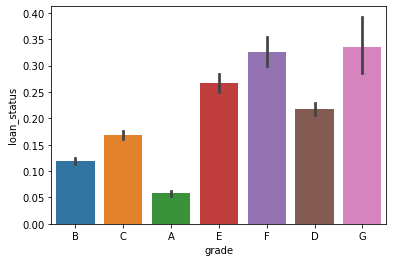

In [514]:
# Grade accross Loan Status
plot_cat('grade')

#### As the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan.

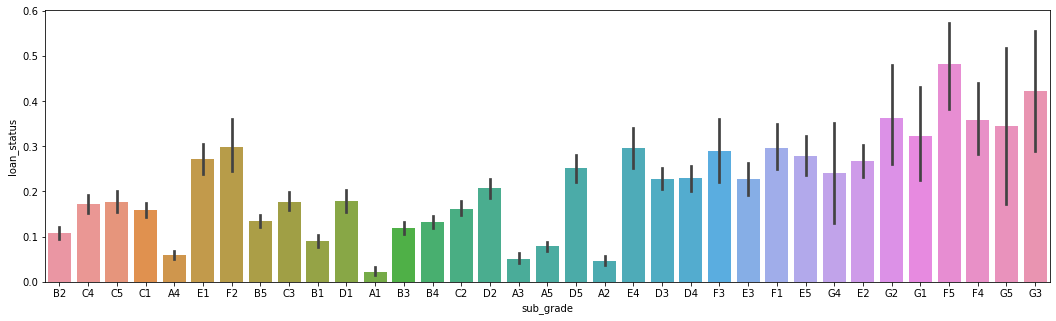

In [515]:
# sub-grade across Loan Status
plt.figure(figsize=(18, 5))
plot_cat('sub_grade')

####  As the Sub grade of loan goes from A to G, the default rate increases. This is expected as per the grade chart

In [516]:
# Term across Loan Status

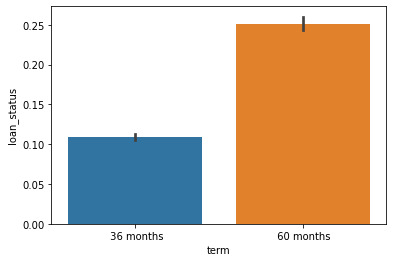

In [517]:
plot_cat('term')

#### We can see that chances of default is more with 60 months period.

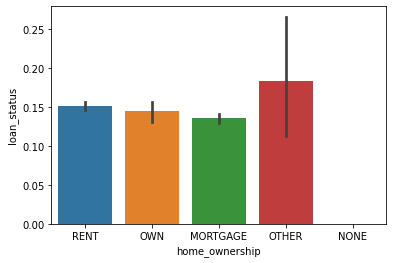

In [518]:
#Home Ownership across Loan Status
plot_cat('home_ownership')

#### Default rate is lower when mortgage is there and high with Other.

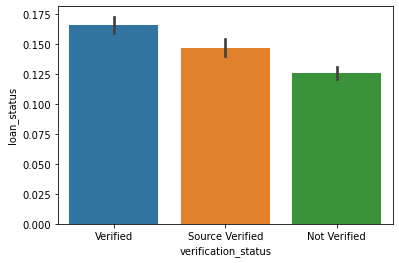

In [519]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plot_cat('verification_status')

#### Surprisingly where the verification status is verified the default rate is very high.

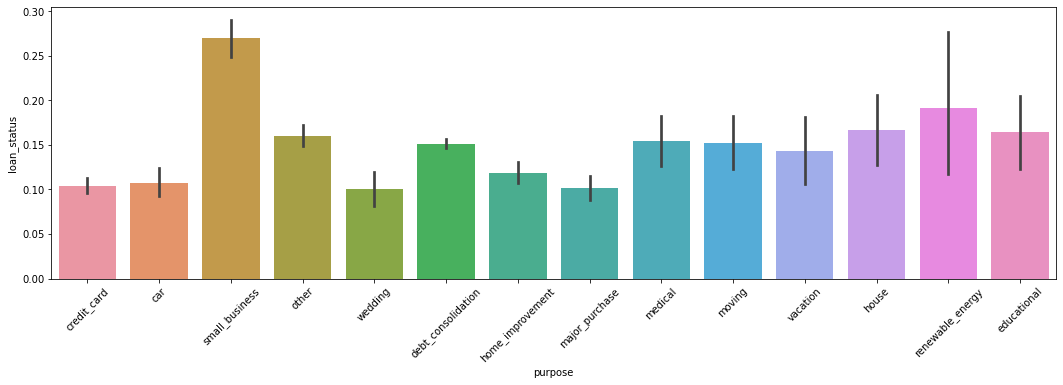

In [520]:
# purpose: 
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45)
plot_cat('purpose')

#### small business loans defualt the most, then renewable energy and education

In [521]:
# Observing the distribution of loans across years and Months
# Convert the year column into datetime and then extract year and month from it

In [522]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [523]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [524]:
# Observing the distribution of loans across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [525]:
# Observing the distribution of loans across Months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

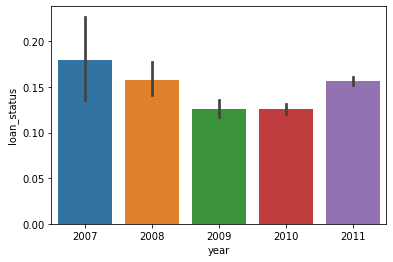

In [526]:
plot_cat('year')

#### We can see that default rate has increased in 2011 unlike the trend from 2007

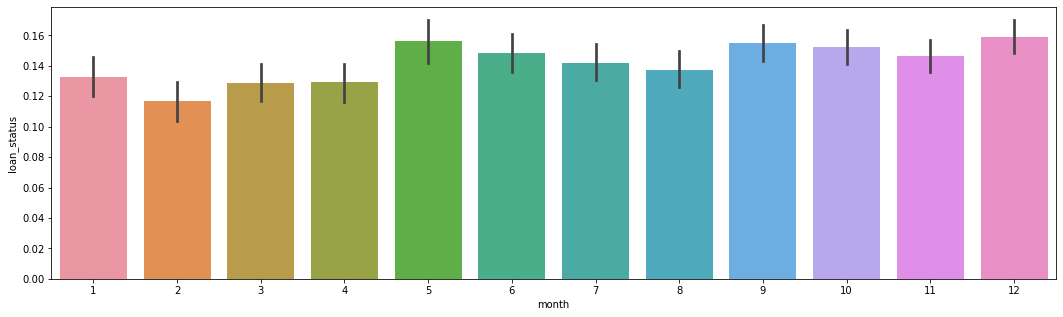

In [527]:
plt.figure(figsize=(18, 5))
plot_cat("month")

#### There is not much change in the default rate across months

# Loan Status across Continous Variables

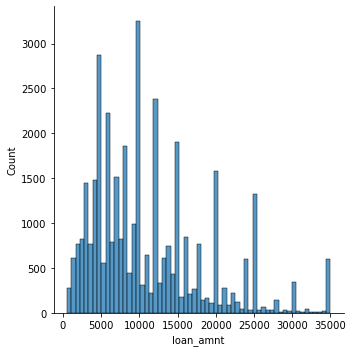

In [528]:
sns.displot(df['loan_amnt'])
plt.show()

In [529]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [530]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

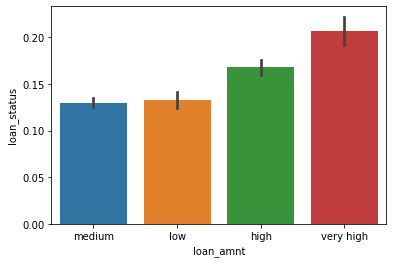

In [531]:
plot_cat("loan_amnt")

#### We can see that as the loan amount increased the default rate also increased considerably.

In [532]:
# converting funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

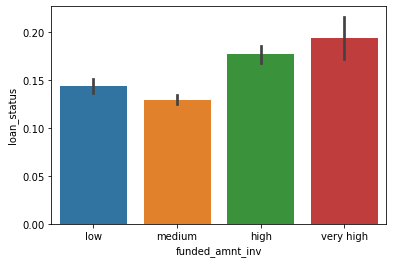

In [533]:
# funded amount invested across loan status
plot_cat('funded_amnt_inv')

#### Higher the funded amount invested higher is the default rate

In [534]:
# Convert interest rate also to low, medium, high
# binning Interest Rate
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

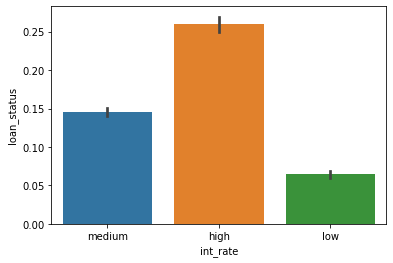

In [535]:
plot_cat('int_rate')

#### It is evident that higher the interest rate higher the chance of default

In [536]:
# We have taken into consideration the amount of debt aviled to the annual income
# debt to income ratio
def debt_to_income(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: debt_to_income(x))

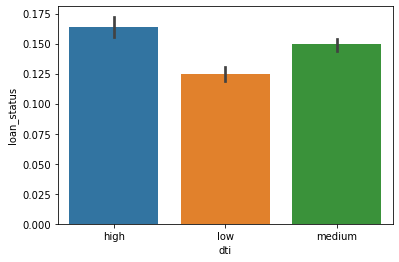

In [537]:
plot_cat("dti")

#### Wherever debt to income ratio is higher the default probability is high.

In [538]:
# funded amount
def fund_amt(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: fund_amt(x))

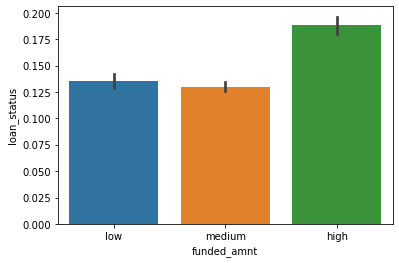

In [539]:
plot_cat("funded_amnt")

#### Wherever funded amoun is higher the default probability is high

In [540]:
# Installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

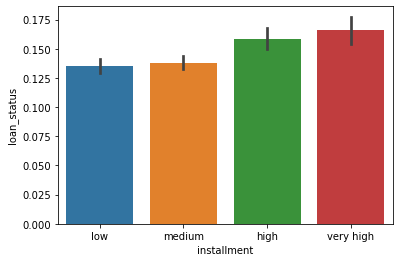

In [541]:
plot_cat('installment')

#### We can see strong corelation between loan period and installment as higher the installments higher the chance of default.

In [542]:
# annual income
def annual_inc(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_inc(x))

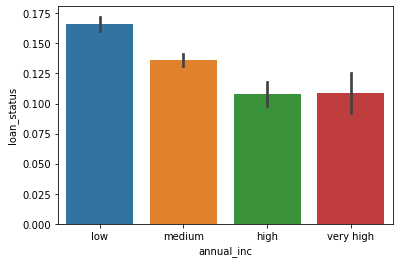

In [543]:
plot_cat('annual_inc')

#### Lower the income higher the chances of default

In [544]:
df.emp_length.isnull().sum()

0

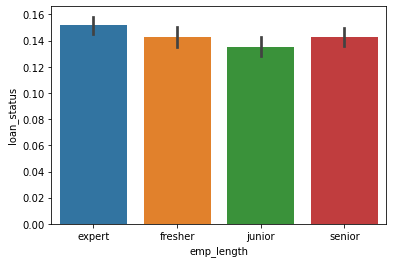

In [545]:
# binning the employee service length
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))
plot_cat('emp_length')

#### Employee's lenght of service doesn't seem to have much effect on default rate.

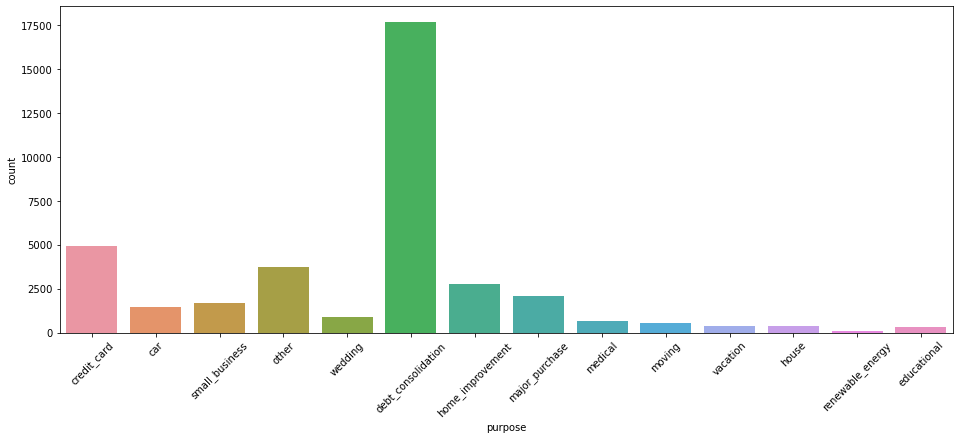

In [546]:
# Quantum of loans for each type (purpose) of the loan
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.countplot(x='purpose', data=df)
plt.show()

 #### Major part of loans are for debt consolidation (to repay otehr debts), then credit card, major purchase etc.

In [547]:
# There are 5 purpose's which mainly consititute the major loan disbursals. Namely Debt Consolidation, Credit Card, Other, Home Improvement and major purchase.
# As we cannot define the purpose "other", we will discard the variable and analyse the other 4 purposes.
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

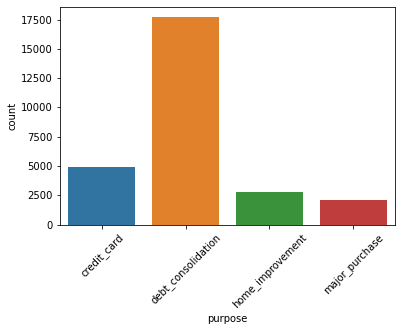

In [548]:
# plotting the 4 major contributors in purpose
sns.countplot(x=df['purpose'])
plt.xticks(rotation=45)
plt.show()

In [551]:
# comparing the default rates across two types of categorical variables at a time
# purpose of loan, loan status and another categorical variable

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

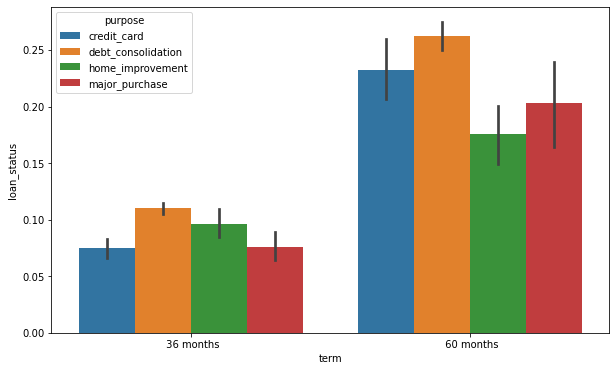

In [552]:
# Across Loan Term
plot_segmented('term')

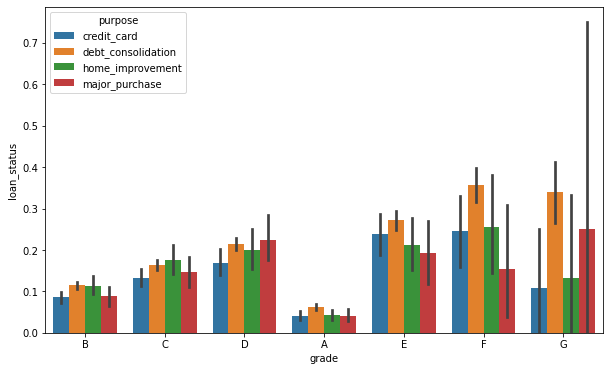

In [553]:
# Across the Grade
plot_segmented('grade')

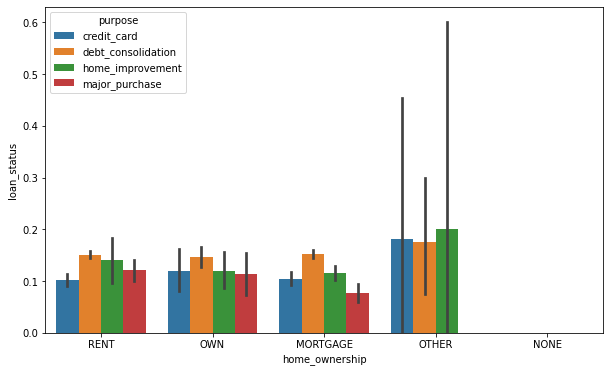

In [363]:
# Across the home ownership
plot_segmented('home_ownership')

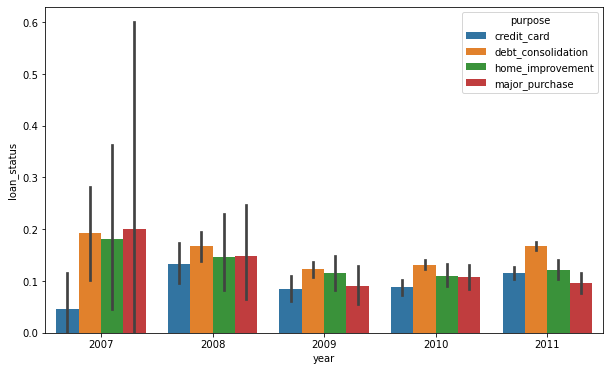

In [364]:
# Across the year
plot_segmented('year')

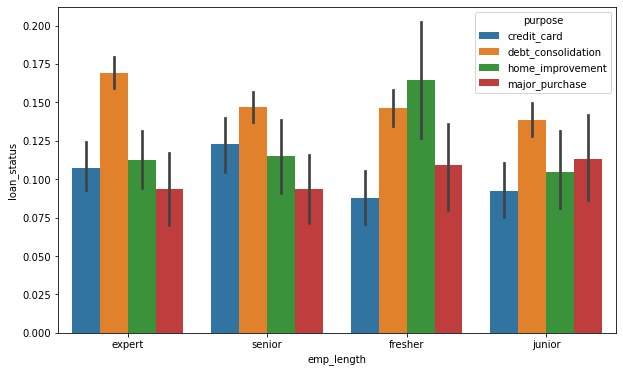

In [365]:
# Across the variable emp_length
plot_segmented('emp_length')

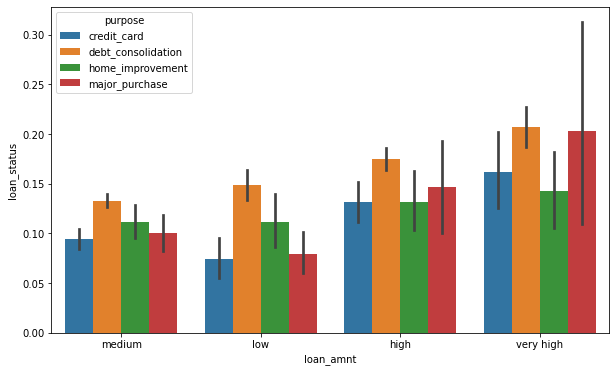

In [366]:
# Across Loan Amount
plot_segmented('loan_amnt')

#### loan amount has same trend across loan purposes and across the level of loan amount

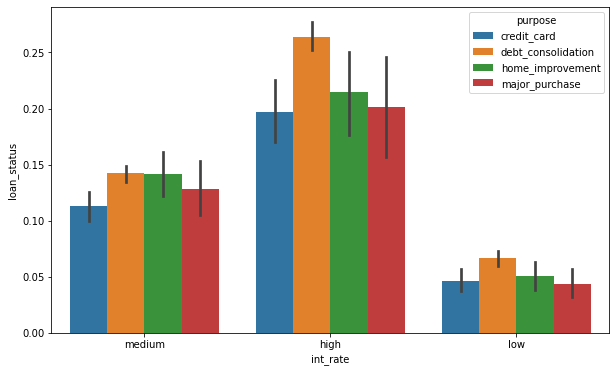

In [367]:
# Across the interest rate
plot_segmented('int_rate')

#### When the Interest rate is high the incidence of default is very high

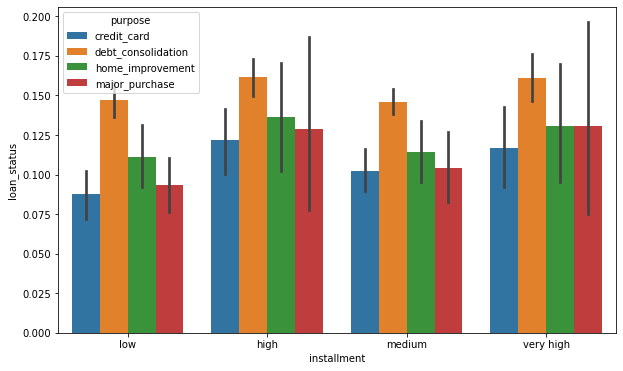

In [368]:
# Across installment
plot_segmented('installment')

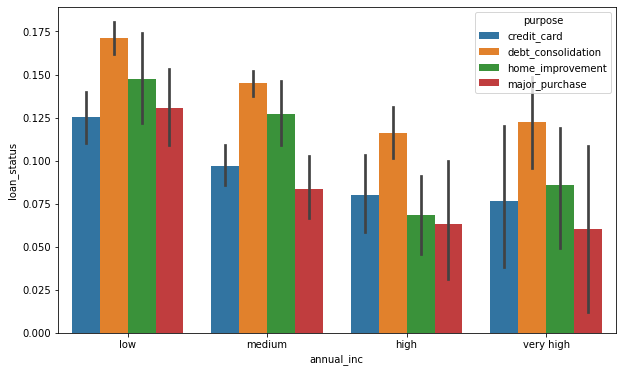

In [369]:
# annual income
plot_segmented('annual_inc')

#### Low Income applicants are more prone to default in general and variance in the very high income group is very high in comparision to other income groups. 

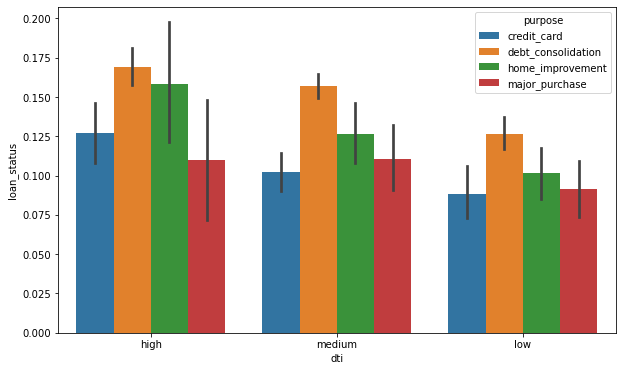

In [370]:
# debt to income ratio
plot_segmented('dti')

#### The default rate is very high where debt to income ration is very high especially loans taken for home improvement

In [371]:
# Calculating the effect of the different varaibles on default rate
def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

In [372]:
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']
print([i for i in df.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


C:\Users\Zenbook\AppData\Local\Temp\ipykernel_21040\125440480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['loan_status'] = df['loan_status']


In [373]:
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0}


In [374]:
# From the above results we can see that following variables are effecting the default rate considerably:
# 1. Grade/Sub Grade - 27%/46%
# 2. Interest Rate - 19%
# 3. Home Ownership - 16%
# 4. Loan Amount - 7%